# Install and Import Dependancies

In [23]:
!pip install pandas shap pycaret

In [24]:
import pandas as pd
from pycaret.classification import *

# Lord Data into the Notebook

In [25]:
df = pd.read_csv('heart.csv')

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [27]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Train and Evaluate Model

In [28]:
catalog = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope','ca','thal']

In [29]:
experiment = setup(df, target='target', categorical_features=catalog )

,Description,Value
0,Session id,7907
1,Target,target
2,Target type,Binary
3,Original data shape,"(1025, 14)"
4,Transformed data shape,"(1025, 28)"
5,Transformed train set shape,"(717, 28)"
6,Transformed test set shape,"(308, 28)"
7,Numeric features,1
8,Categorical features,12
9,Preprocess,True


/usr/local/lib/python3.10/dist-packages/pycaret/internal/metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [30]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9861,0.0000,0.9919,0.9817,0.9865,0.9721,0.9727,0.3210
rf,Random Forest Classifier,0.9749,0.0000,0.9757,0.9764,0.9756,0.9499,0.9508,0.3620
xgboost,Extreme Gradient Boosting,0.9736,0.0000,0.9730,0.9763,0.9741,0.9471,0.9481,0.3600
dt,Decision Tree Classifier,0.9722,0.0000,0.9703,0.9762,0.9726,0.9443,0.9456,0.3410
lightgbm,Light Gradient Boosting Machine,0.9722,0.0000,0.9730,0.9735,0.9728,0.9443,0.9452,1.0570
gbc,Gradient Boosting Classifier,0.9568,0.0000,0.9675,0.9510,0.9586,0.9135,0.9149,0.3270
ada,Ada Boost Classifier,0.8940,0.0000,0.9075,0.8942,0.8985,0.7877,0.7922,0.4060
ridge,Ridge Classifier,0.8829,0.0000,0.9155,0.8670,0.8894,0.7651,0.7690,0.1800
lda,Linear Discriminant Analysis,0.8815,0.0000,0.9155,0.8647,0.8882,0.7623,0.7661,0.1890
lr,Logistic Regression,0.8814,0.0000,0.8992,0.8760,0.8865,0.7625,0.7646,1.1530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Test Model

### Extra Tree Classifier

In [36]:
extra_tree = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9805,0.9996,0.9810,0.9810,0.9810,0.9610,0.9610


In [37]:
extra_tree

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
111,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1,1,1.00
552,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0,0,1.00
991,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0,0,1.00
229,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0,0,1.00
608,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0,0,0.70
818,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1,1,1.00
444,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1,1,1.00
496,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0,1,0.51


In [51]:
y_target = extra_tree[['target']]
y_pred = extra_tree[['prediction_label']]

In [52]:
y_target

,target
111,1
552,0
991,0
229,0
608,0
...,...
163,0
818,1
444,1
496,0


In [53]:
y_pred

,prediction_label
111,1
552,0
991,0
229,0
608,0
...,...
163,0
818,1
444,1
496,1


In [60]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [61]:
cm = confusion_matrix(y_true=y_target, y_pred=y_pred)

In [62]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [63]:
cm_plot_labels = ['no_Disease','Disease']

Confusion matrix, without normalization
[[147   3]
 [  3 155]]


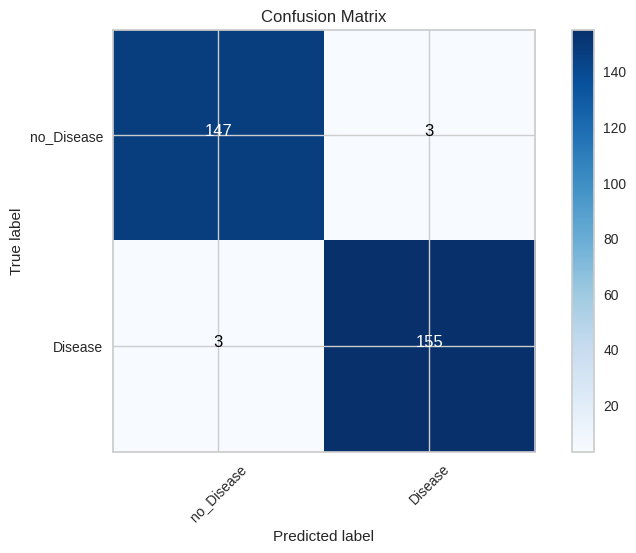

In [64]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Random Forest Classifier

In [67]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,0.0000,0.9189,1.0000,0.9577,0.9168,0.9200
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9583,0.0000,0.9459,0.9722,0.9589,0.9167,0.9170
3,0.9583,0.0000,0.9459,0.9722,0.9589,0.9167,0.9170
4,0.9861,0.0000,1.0000,0.9737,0.9867,0.9722,0.9726
5,0.9861,0.0000,0.9730,1.0000,0.9863,0.9722,0.9726
6,0.9444,0.0000,0.9730,0.9231,0.9474,0.8886,0.8900
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [72]:
predictions = predict_model(rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9903,0.9996,0.9810,1.0000,0.9904,0.9805,0.9807


In [73]:
predictions

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
111,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1,1,0.92
552,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0,0,1.00
991,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0,0,0.96
229,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0,0,0.96
608,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,0,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0,0,0.57
818,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1,1,0.95
444,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1,1,1.00
496,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0,0,0.61


In [74]:
rf_target = predictions[['target']]
rf_pred = predictions[['prediction_label']]

In [75]:
rf_target

,target
111,1
552,0
991,0
229,0
608,0
...,...
163,0
818,1
444,1
496,0


In [76]:
rf_pred

,prediction_label
111,1
552,0
991,0
229,0
608,0
...,...
163,0
818,1
444,1
496,0


In [77]:
cm = confusion_matrix(y_true=rf_target, y_pred=rf_pred)

In [78]:
cm_plot_labels = ['no_Disease','Disease']

Confusion matrix, without normalization
[[150   0]
 [  3 155]]


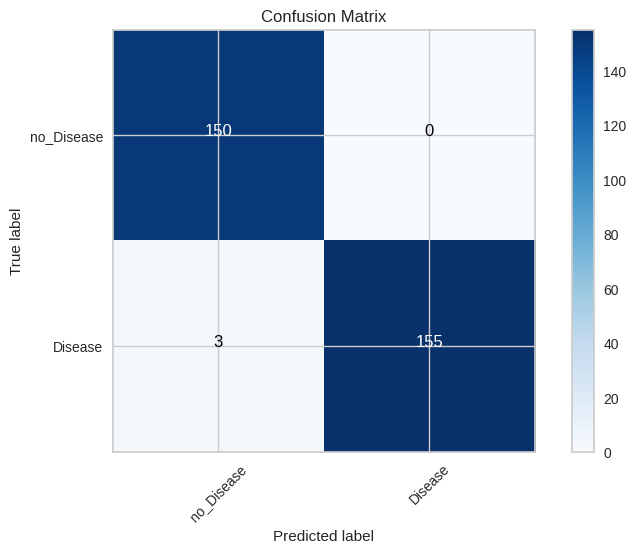

In [79]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Save Model

In [91]:
save_model(best_model, model_name='HD model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['oldpeak'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'cp', 'trestbps',
                                              'cho...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, cr